In [67]:
from math import *
import numpy as np
import scipy.interpolate as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [68]:
import pandas as pd

In [69]:
vmax = 100
vmin = 0
cmap = 'viridis_r'

In [70]:
readers = []

In [71]:
jxlfile = open('./cjxl/average.csv', 'r', newline='')
jxlreader = pd.read_csv(jxlfile, sep='\t')
a = jxlreader["Method"].map(lambda x: x.split(" ")[1])
jxlreader["Method"].update(a)
readers.append(jxlreader)

In [76]:
aviffile = open('./avif/average.csv', 'r', newline='')
avifreader = pd.read_csv(aviffile, sep='\t')
a = avifreader["Method"].map(lambda x: x.split("--max ")[1].split(" ")[0])
avifreader["Method"].update(a)
avifreader.drop_duplicates(subset=["Res bpp"],inplace=True, ignore_index=True)
readers.append(avifreader)

In [78]:
def plot_2d(ax_main, ax_bottom, x, y, x_new, y_new):
    sc1_main = ax_main.plot(x_new, y_new, label="lines")
    sc2 = ax_main.scatter(x, y,
            linewidths=1, alpha=.7,
            marker='o',
            edgecolor='k',
            s=50,
            c='None')
    sb = ax_bottom.plot(x_new,z_new)

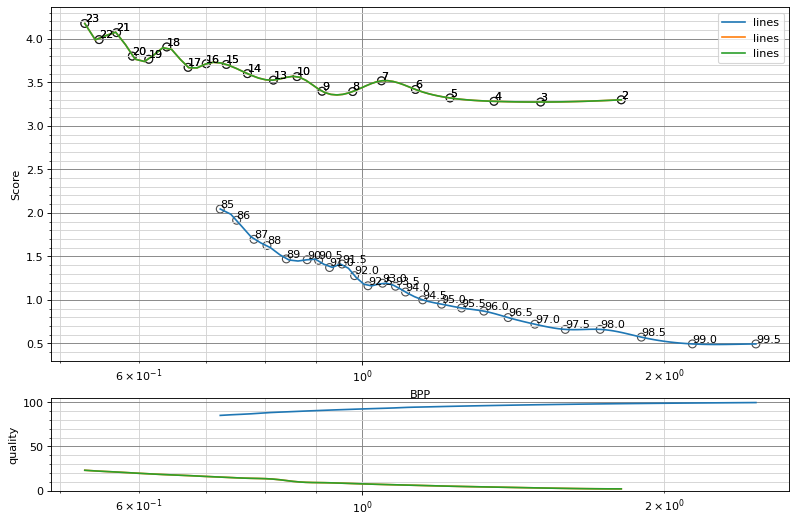

In [83]:
fig = plt.figure(figsize=(16, 8), dpi=80)
grid = plt.GridSpec(4,4, hspace=0.4, wspace=0.1)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[])
ax_main.set_xscale('log')
ax_bottom.set_xscale('log')

for r in readers:
    x = r["Res bpp"]
    y = r["butteraugli max norm"]
#     y = r["butteraugli pnorm"]
    z = r["Method"]
    f_y = sp.interp1d(x, y, kind="cubic")
    f_z = sp.interp1d(x, z, kind="cubic")
    x_new = np.linspace(min(x), max(x), num=100)
    y_new = f_y(x_new)
    z_new = f_z(x_new)
    plot_2d(ax_main, ax_bottom, x, y, x_new, y_new)
    for i, txt in enumerate(z):
        ax_main.annotate(str(txt), (x[i], y[i]+0.02))


# PLOT SETTINGS
ax_main.grid(True, color='gray')
ax_main.minorticks_on()
ax_main.grid(True, which='minor', color='lightgray')
# ax_main.set_xticks(np.arange(min(x_new), max(x_new)+1, 0.5))
ax_main.set_xlabel("BPP")
ax_main.set_ylabel("Score")

ax_main.legend()

ax_bottom.grid(True, color='gray')
ax_bottom.minorticks_on()
ax_bottom.grid(True, which='minor', color='lightgray')
# ax_bottom.set_xticks(np.arange(min(x_new), max(x_new)+1, 0.5))
ax_bottom.set_ylim(0,105)
ax_bottom.set_ylabel("quality")

plt.show()